# <center> Customer Segment Prediction

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Task 1: Data Loading & Exploration

In [ ]:
data=pd.read_csv("Customers.csv")

In [ ]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.shape

(200, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
data.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
159,160,Female,30,78,73
173,174,Male,36,87,92
164,165,Male,50,85,26
90,91,Female,68,59,55
119,120,Female,50,67,57


In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
data.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
# drop the CustomerID column:

data.drop(['CustomerID'], axis = 1, inplace= True)

In [ ]:
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Task 2: Create Scatter Plot between Annual Income & Spending Score

####Data Visualization

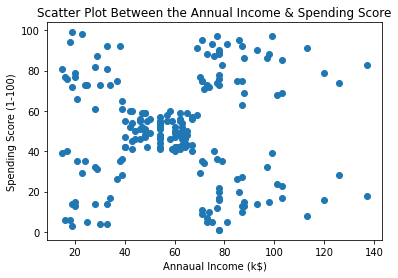

In [ ]:
plt.scatter(data["Annual Income (k$)"],data["Spending Score (1-100)"])
plt.xlabel("Annaual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Scatter Plot Between the Annual Income & Spending Score")
plt.show()

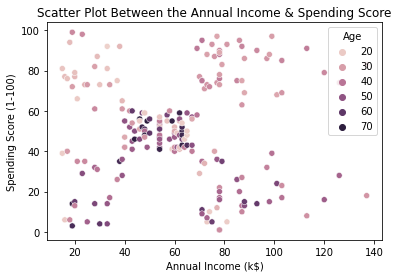

In [ ]:
sns.scatterplot(x=data["Annual Income (k$)"],y=data["Spending Score (1-100)"],data=data,color="red",hue=data["Age"])
plt.title("Scatter Plot Between the Annual Income & Spending Score")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

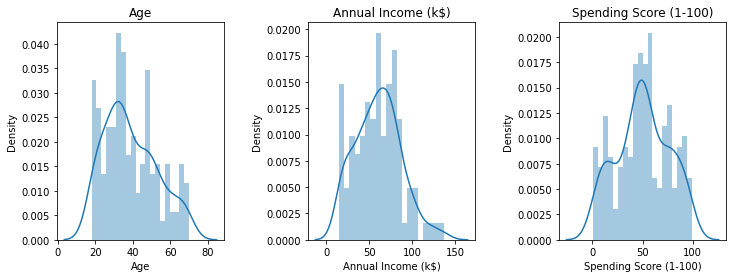

In [ ]:
plt.figure(1, figsize=(12,4))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  n+=1
  plt.subplot(1,3,n)
  plt.subplots_adjust(hspace= 0.5, wspace=0.5)
  sns.distplot(data[x], bins = 20)
  plt.title('{}'.format(x))
plt.show()

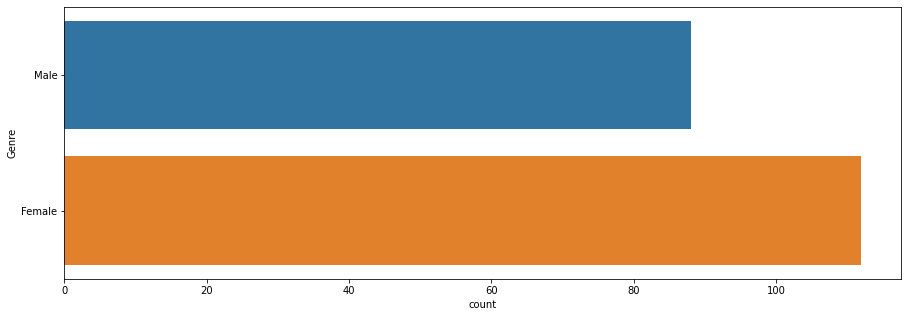

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(y = 'Genre' , data =data)
plt.show()

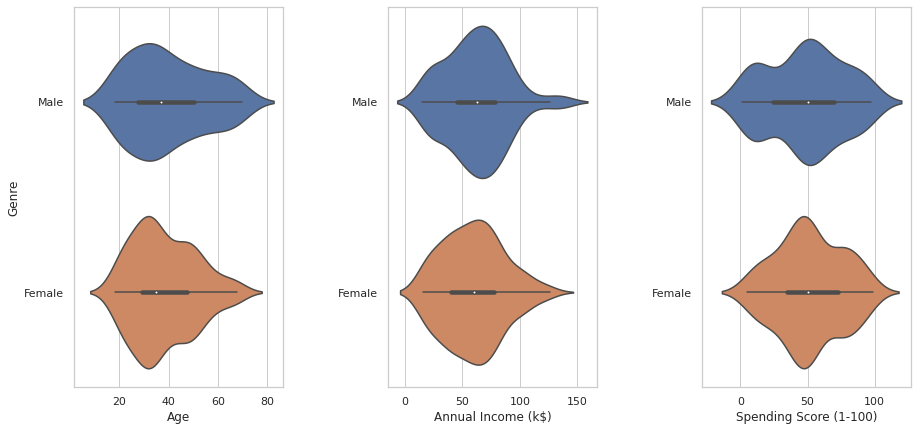

In [ ]:
plt.figure(1, figsize=(15,7))
n = 0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  n+=1
  plt.subplot(1,3,n)
  sns.set(style = 'whitegrid')
  plt.subplots_adjust(hspace= 0.5, wspace=0.5)
  sns.violinplot(x = cols,y = 'Genre', data = data)
  plt.ylabel('Genre' if n==1 else '')
plt.show()

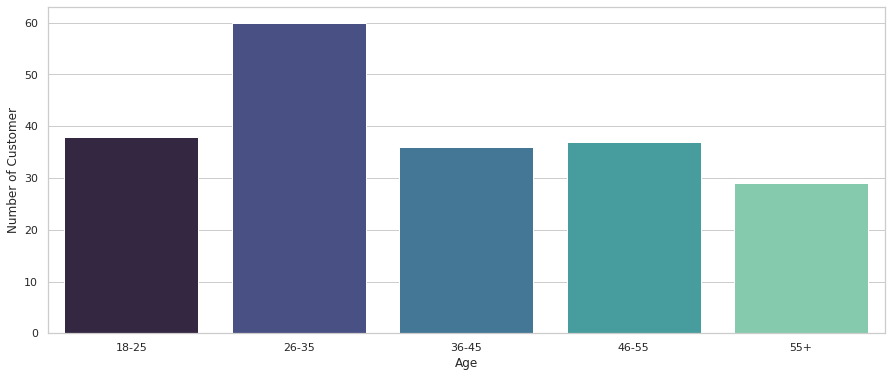

In [ ]:
age_18_25 = data.Age[(data.Age >= 18) & (data.Age <= 25)]
age_26_35 = data.Age[(data.Age >= 26) & (data.Age <= 35)]
age_36_45 = data.Age[(data.Age >= 36) & (data.Age <= 45)]
age_46_55 = data.Age[(data.Age >= 46) & (data.Age <= 55)]
age_above_55 = data.Age[(data.Age >= 56)]

agex = ['18-25', '26-35', '36-45','46-55','55+']
agey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_above_55.values)]

plt.figure(figsize = (15,6))
sns.barplot(x = agex, y = agey , palette='mako')
plt.xlabel('Age')
plt.ylabel('Number of Customer')
plt.show()

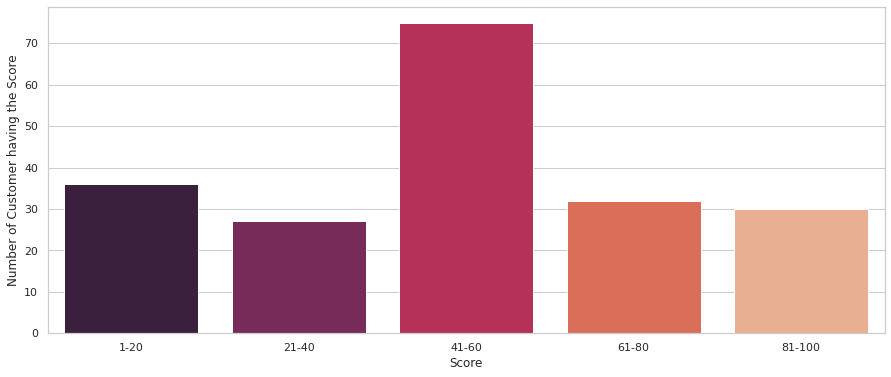

In [33]:
ss_1_20 = data['Spending Score (1-100)'][(data['Spending Score (1-100)'] >= 1) & (data['Spending Score (1-100)'] <= 20)]
ss_21_40 = data['Spending Score (1-100)'][(data['Spending Score (1-100)'] >= 21) & (data['Spending Score (1-100)'] <= 40)]
ss_41_60 = data['Spending Score (1-100)'][(data['Spending Score (1-100)'] >= 41) & (data['Spending Score (1-100)'] <= 60)]
ss_61_80 = data['Spending Score (1-100)'][(data['Spending Score (1-100)'] >= 61) & (data['Spending Score (1-100)'] <= 80)]
ss_81_100 = data['Spending Score (1-100)'][(data['Spending Score (1-100)'] >= 81) & (data['Spending Score (1-100)'] <= 100)]

ssx = ['1-20','21-40','41-60','61-80','81-100']
ssy = [len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x = ssx, y = ssy, palette='rocket')
plt.xlabel('Score')
plt.ylabel('Number of Customer having the Score')
plt.show()

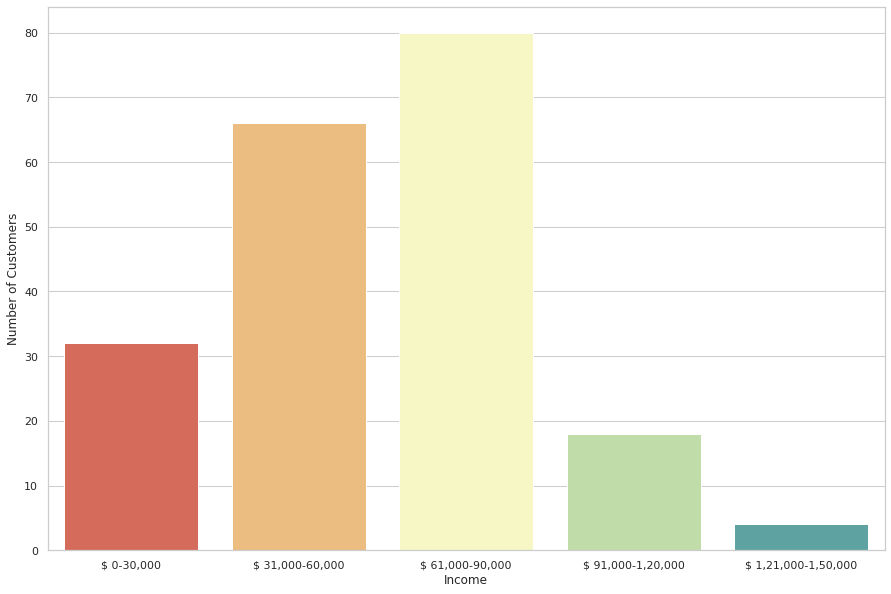

In [37]:
ann_0_30 = data['Annual Income (k$)'][(data['Annual Income (k$)'] >= 0 ) & (data['Annual Income (k$)'] <= 30)]
ann_31_60 = data['Annual Income (k$)'][(data['Annual Income (k$)'] >= 31 ) & (data['Annual Income (k$)'] <= 60)]
ann_61_90 = data['Annual Income (k$)'][(data['Annual Income (k$)'] >= 61 ) & (data['Annual Income (k$)'] <= 90)]
ann_91_120 = data['Annual Income (k$)'][(data['Annual Income (k$)'] >= 91 ) & (data['Annual Income (k$)'] <= 120)]
ann_121_150 = data['Annual Income (k$)'][(data['Annual Income (k$)'] >= 121 ) & (data['Annual Income (k$)'] <= 150)]

annx = ['$ 0-30,000','$ 31,000-60,000','$ 61,000-90,000','$ 91,000-1,20,000','$ 1,21,000-1,50,000']
anny = [len(ann_0_30.values),len(ann_31_60.values),len(ann_61_90.values),len(ann_91_120.values),len(ann_121_150.values)]

plt.figure(figsize=(15,10))
sns.barplot(x = annx, y = anny, palette='Spectral')

plt.xlabel('Income')
plt.ylabel('Number of Customers')
plt.show()

## Task 3: Perform Scaling using MinMaxScaler

In [50]:
# Creating Clusters based on Age and Spending Score:

x = data.loc[:,['Age','Spending Score (1-100)']].values

from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
sc.fit(x)
sc.transform(x)

array([[0.01923077, 0.3877551 ],
       [0.05769231, 0.81632653],
       [0.03846154, 0.05102041],
       [0.09615385, 0.7755102 ],
       [0.25      , 0.39795918],
       [0.07692308, 0.76530612],
       [0.32692308, 0.05102041],
       [0.09615385, 0.94897959],
       [0.88461538, 0.02040816],
       [0.23076923, 0.7244898 ],
       [0.94230769, 0.13265306],
       [0.32692308, 1.        ],
       [0.76923077, 0.14285714],
       [0.11538462, 0.7755102 ],
       [0.36538462, 0.12244898],
       [0.07692308, 0.79591837],
       [0.32692308, 0.34693878],
       [0.03846154, 0.66326531],
       [0.65384615, 0.28571429],
       [0.32692308, 0.98979592],
       [0.32692308, 0.34693878],
       [0.13461538, 0.73469388],
       [0.53846154, 0.04081633],
       [0.25      , 0.73469388],
       [0.69230769, 0.13265306],
       [0.21153846, 0.82653061],
       [0.51923077, 0.31632653],
       [0.32692308, 0.6122449 ],
       [0.42307692, 0.30612245],
       [0.09615385, 0.87755102],
       [0.

## Task 4: Develop Clusters using KMeans

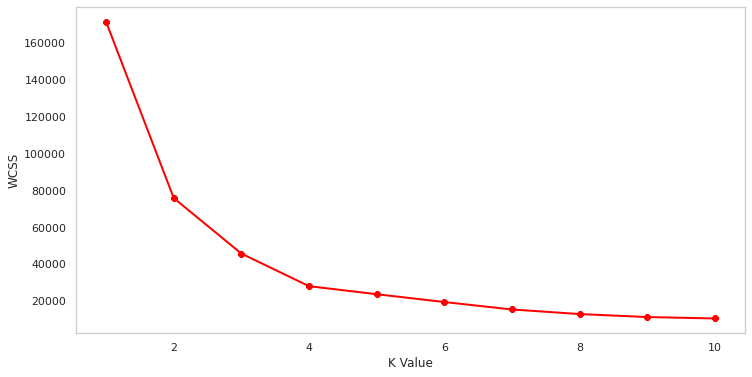

In [51]:
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
  kmeans = KMeans(n_clusters = k, init = 'k-means++')
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth = 2, color = 'red', marker = '8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

In [52]:
kmeans = KMeans(n_clusters = 4)
label = kmeans.fit_predict(x)

print(label)

[3 1 0 1 3 1 0 1 0 1 0 1 0 1 0 1 3 3 0 1 3 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0
 1 0 1 2 1 2 3 0 3 2 3 3 3 2 3 3 2 2 2 2 2 3 2 2 3 2 2 2 3 2 2 3 3 2 2 2 2
 2 3 2 3 3 2 2 3 2 2 3 2 2 3 3 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 2 2 2 3 3 3 1 3 1 2 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1 3 1 0 1 2 1
 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0 1 0 1 0 1 3
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [53]:
print(kmeans.cluster_centers_)

[[43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [55.70833333 48.22916667]
 [27.61702128 49.14893617]]


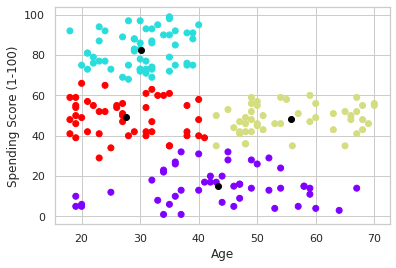

In [54]:
plt.scatter(x[:,0],x[:,1], c=kmeans.labels_,cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'black')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

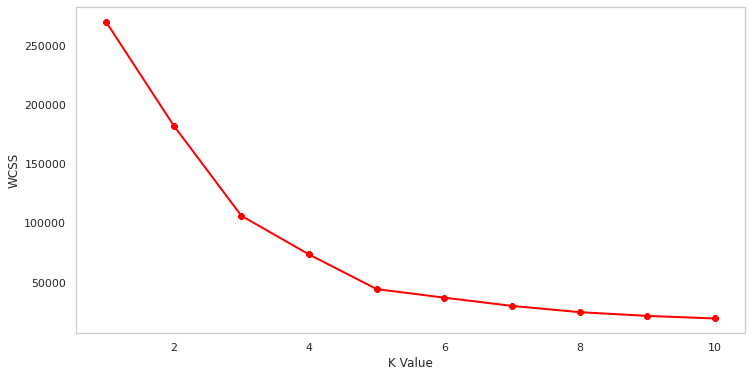

In [56]:
# Creating Clusters based on Annual Income and Spending Score:

b = data.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
  kmeans = KMeans(n_clusters = k, init = 'k-means++')
  kmeans.fit(b)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth = 2, color = 'red', marker = '8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

In [58]:
kmeans = KMeans(n_clusters = 5)
label = kmeans.fit_predict(b)

print(label)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 2 4 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 1 3 2 3 1 3 1 3 2 3 1 3 1 3 1 3 1 3 2 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


In [59]:
print(kmeans.cluster_centers_)

[[25.72727273 79.36363636]
 [88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]]


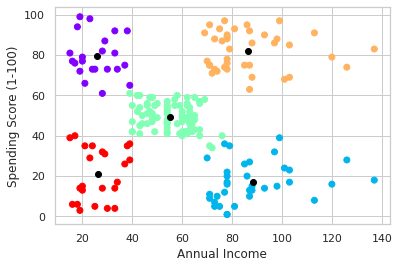

In [60]:
plt.scatter(b[:,0],b[:,1], c=kmeans.labels_,cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'black')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.show()

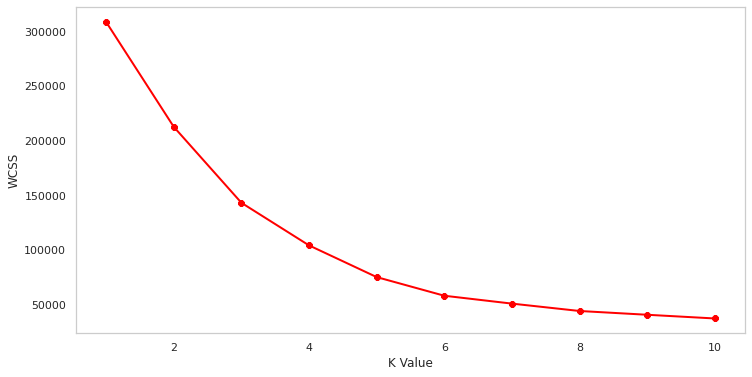

In [61]:
# Creating a Clusters based on Age, Annual Income, and Spending Score:

c = data.iloc[:,1:]

wcss=[]
for k in range(1,11):
  kmeans = KMeans(n_clusters = k, init = 'k-means++')
  kmeans.fit(c)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth = 2, color = 'red', marker = '8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

In [63]:
kmeans = KMeans(n_clusters = 5)
label = kmeans.fit_predict(c)

print(label)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 3 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [64]:
print(kmeans.cluster_centers_)

[[25.52173913 26.30434783 78.56521739]
 [40.66666667 87.75       17.58333333]
 [32.69230769 86.53846154 82.12820513]
 [43.08860759 55.29113924 49.56962025]
 [45.2173913  26.30434783 20.91304348]]


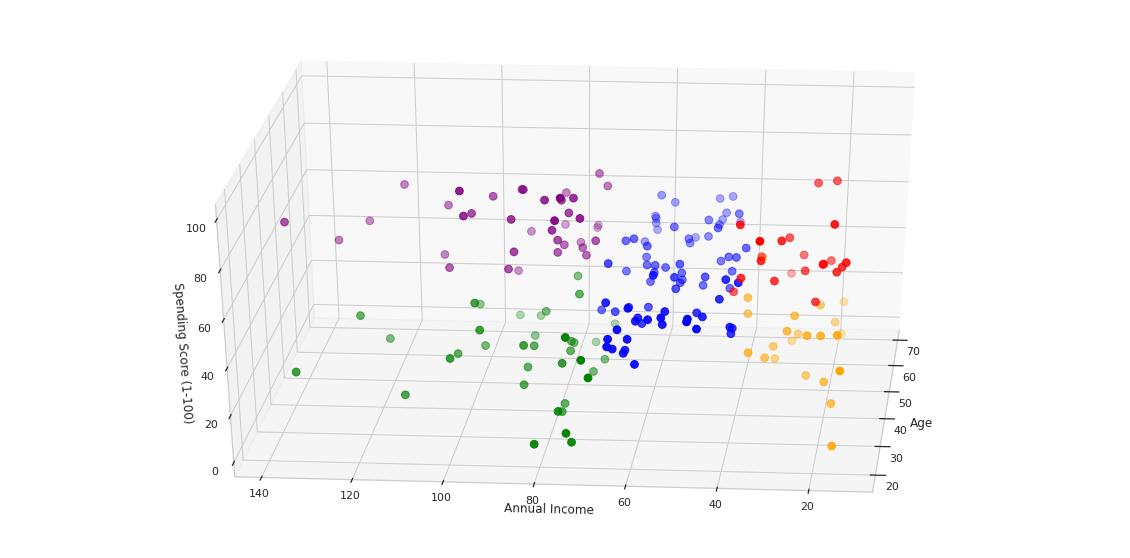

In [65]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

clusters = kmeans.fit_predict(c)
data['label'] = clusters


fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(data.Age[data.label == 0], data['Annual Income (k$)'][data.label == 0], data['Spending Score (1-100)'][data.label == 0], c = 'blue', s = 60)
ax.scatter(data.Age[data.label == 1], data['Annual Income (k$)'][data.label == 1], data['Spending Score (1-100)'][data.label == 1], c = 'red', s = 60)
ax.scatter(data.Age[data.label == 2], data['Annual Income (k$)'][data.label == 2], data['Spending Score (1-100)'][data.label == 2], c = 'green', s = 60)
ax.scatter(data.Age[data.label == 3], data['Annual Income (k$)'][data.label == 3], data['Spending Score (1-100)'][data.label == 3], c = 'orange', s = 60)
ax.scatter(data.Age[data.label == 4], data['Annual Income (k$)'][data.label == 4], data['Spending Score (1-100)'][data.label == 4], c = 'purple', s = 60)
ax.view_init(30,185)

plt.xlabel('Age')
plt.ylabel('Annual Income')
ax.set_zlabel('Spending Score (1-100)')

plt.show()